# XGB Model on sampling-2 Dataset with Cross Validation

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("CheXPre.csv", sep = ';')

In [3]:
df.tail()

,TOA,Oil,MIBK,Temperature,Percentage,Aycicek,Misir,Keten,Badem,Susam,Hint,Citric,Glycolic,Malic
349,1.5,1.5,0.0,0.4,0.8512,0,1,0,0,0,0,0,0,1
350,1.5,1.5,0.0,0.4,0.8542,0,0,1,0,0,0,0,0,1
351,1.5,1.5,0.0,0.4,0.8945,0,0,0,1,0,0,0,0,1
352,1.5,1.5,0.0,0.4,0.8587,0,0,0,0,1,0,0,0,1
353,1.5,1.5,0.0,0.4,0.9274,0,0,0,0,0,1,0,0,1


### Information about Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TOA          354 non-null    float64
 1   Oil          354 non-null    float64
 2   MIBK         354 non-null    float64
 3   Temperature  354 non-null    float64
 4   Percentage   354 non-null    float64
 5   Aycicek      354 non-null    int64  
 6   Misir        354 non-null    int64  
 7   Keten        354 non-null    int64  
 8   Badem        354 non-null    int64  
 9   Susam        354 non-null    int64  
 10  Hint         354 non-null    int64  
 11  Citric       354 non-null    int64  
 12  Glycolic     354 non-null    int64  
 13  Malic        354 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 38.8 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TOA,354.0,0.868644,0.531293,0.0000,0.5000,0.7500,1.50000,1.7500
Oil,354.0,1.271186,1.048783,0.0000,0.0000,1.5000,2.25000,3.0000
MIBK,354.0,0.081356,0.192912,0.0000,0.0000,0.0000,0.00000,0.7000
Temperature,354.0,0.257627,0.033000,0.2500,0.2500,0.2500,0.25000,0.4000
Percentage,354.0,0.565076,0.300484,0.0014,0.3472,0.6146,0.79495,0.9858
Aycicek,354.0,0.163842,0.370656,0.0000,0.0000,0.0000,0.00000,1.0000
Misir,354.0,0.166667,0.373205,0.0000,0.0000,0.0000,0.00000,1.0000
Keten,354.0,0.163842,0.370656,0.0000,0.0000,0.0000,0.00000,1.0000
Badem,354.0,0.163842,0.370656,0.0000,0.0000,0.0000,0.00000,1.0000
Susam,354.0,0.175141,0.380626,0.0000,0.0000,0.0000,0.00000,1.0000


In [6]:
df.isnull().sum()

TOA            0
Oil            0
MIBK           0
Temperature    0
Percentage     0
Aycicek        0
Misir          0
Keten          0
Badem          0
Susam          0
Hint           0
Citric         0
Glycolic       0
Malic          0
dtype: int64

### Visualizing of Dataset

In [7]:
import seaborn as sns

C:\Users\sueda\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


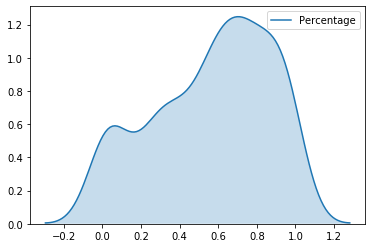

In [8]:
sns.kdeplot(df.Percentage, shade = True);

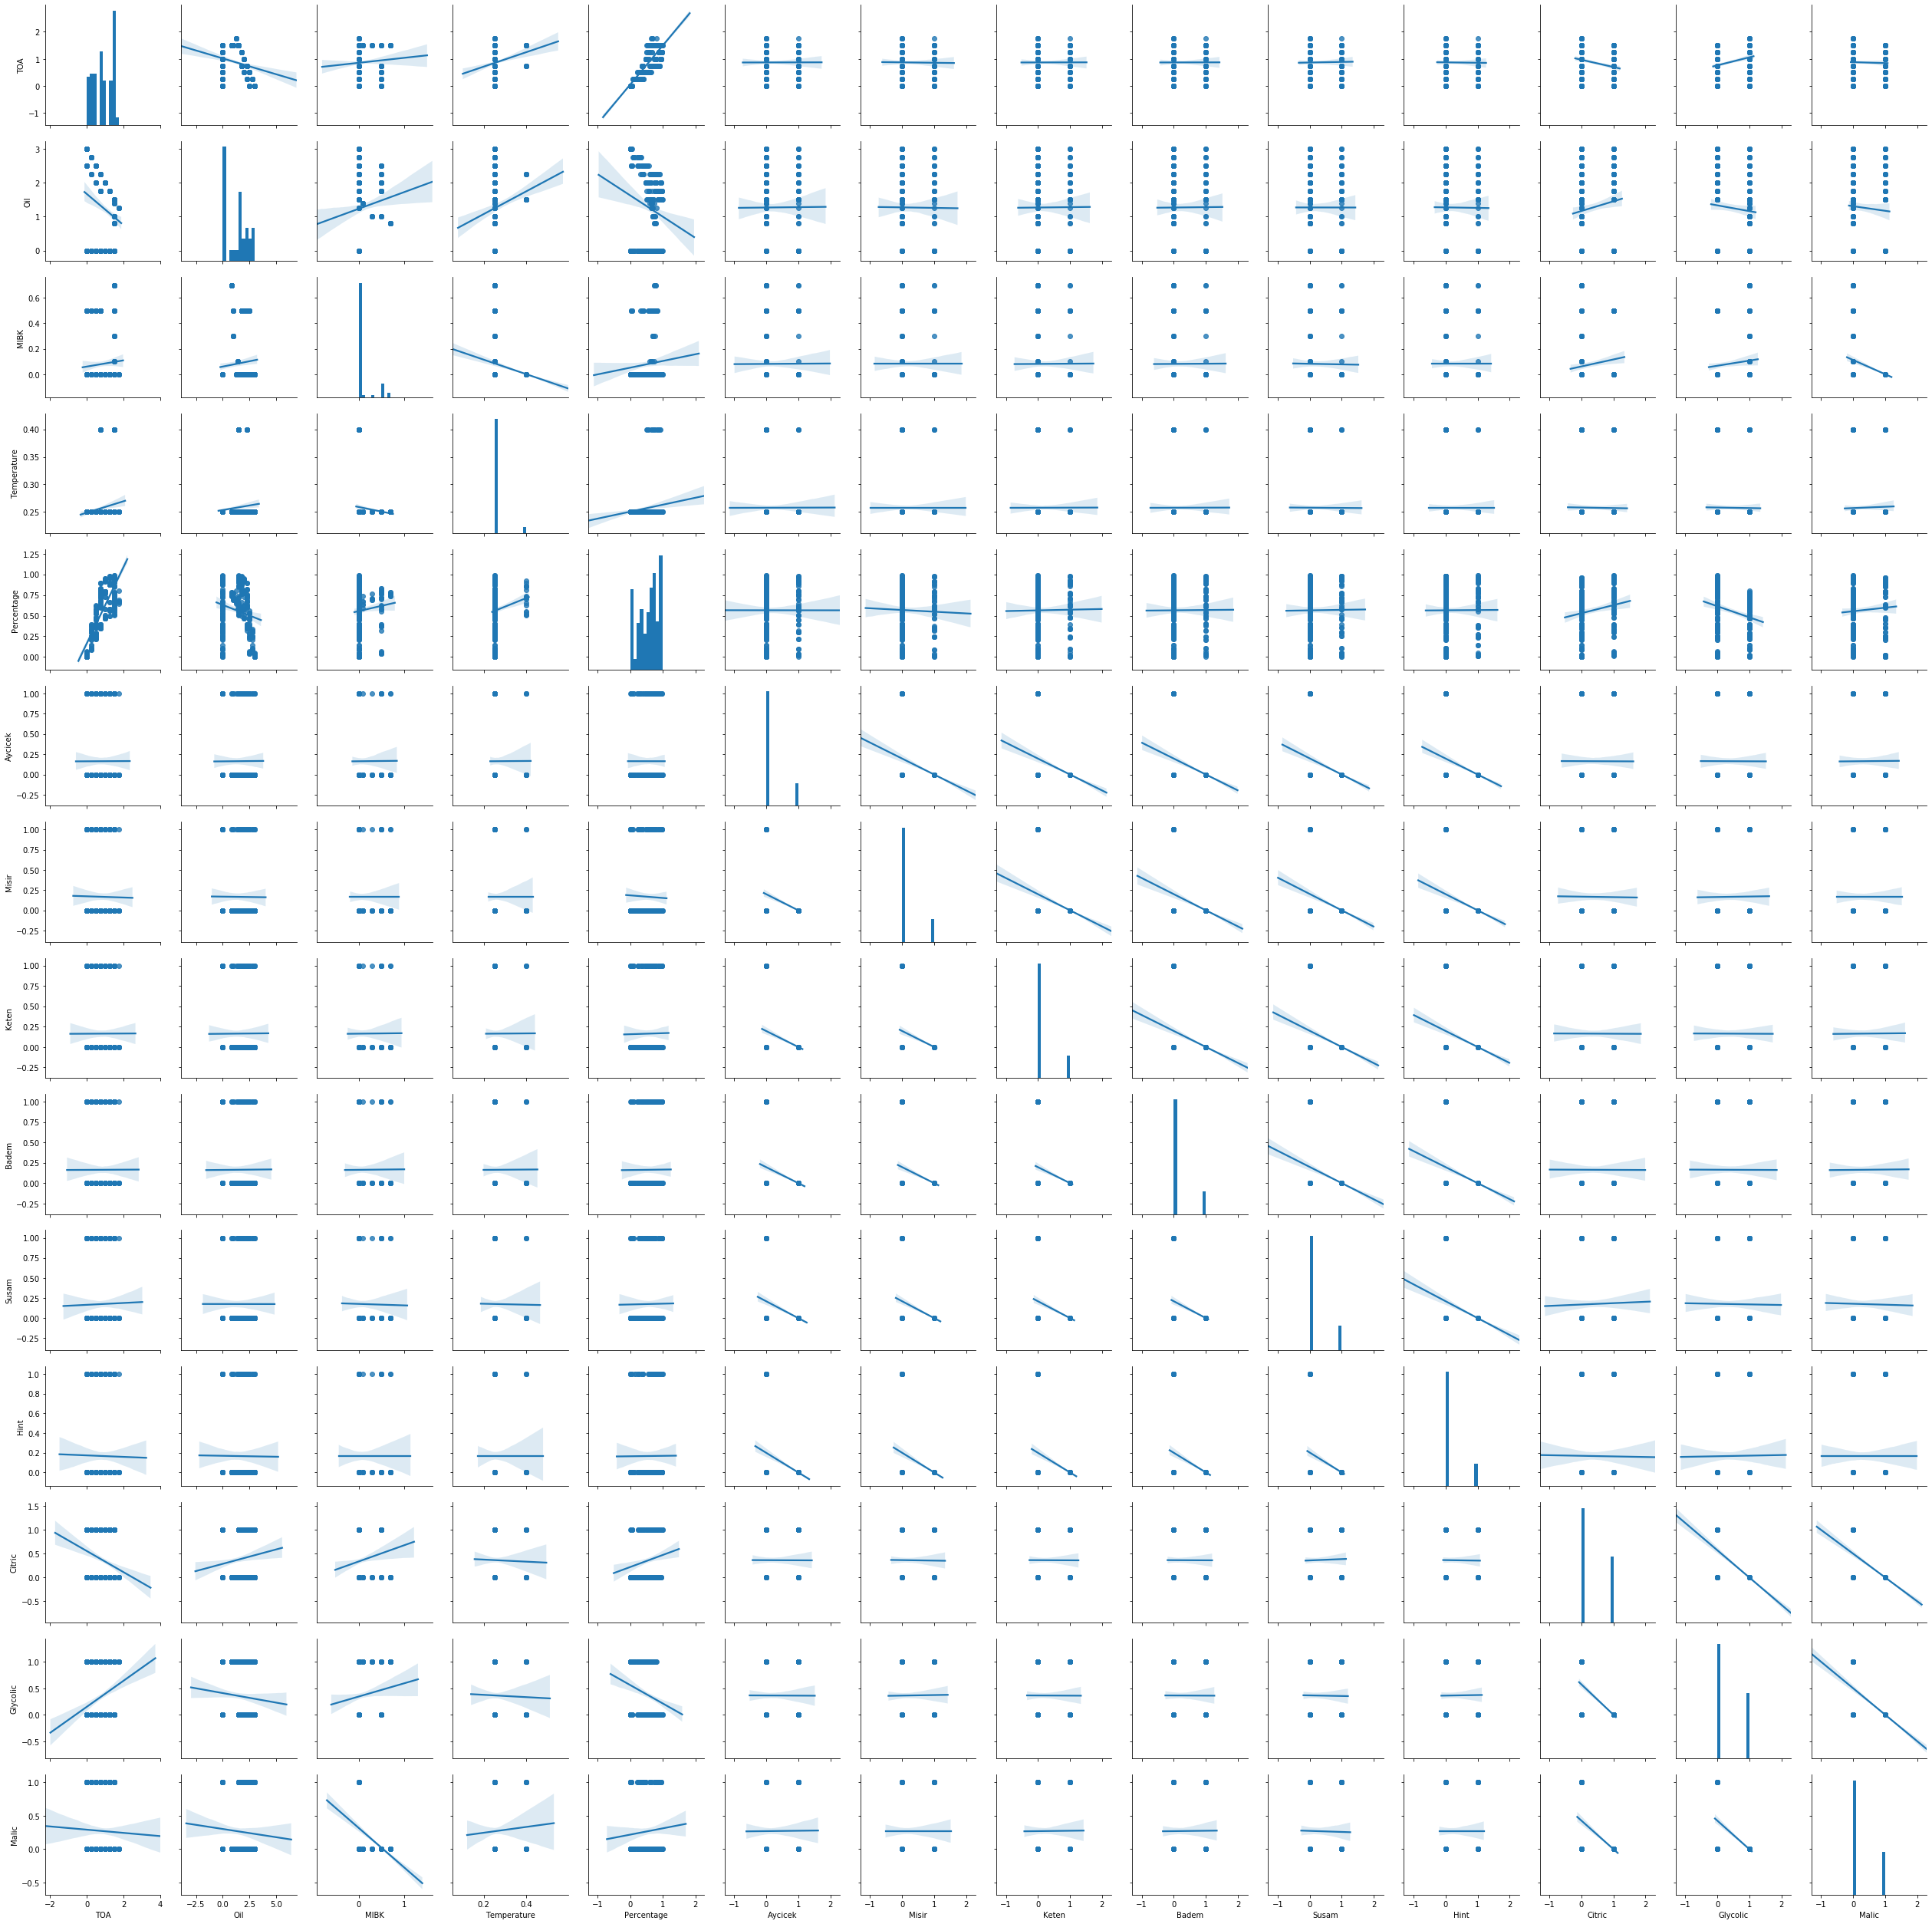

In [9]:
sns.pairplot(df, kind = "reg");

In [10]:
df.corr()

,TOA,Oil,MIBK,Temperature,Percentage,Aycicek,Misir,Keten,Badem,Susam,Hint,Citric,Glycolic,Malic
TOA,1.000000,-0.231398,6.724853e-02,1.663710e-01,0.815709,0.001707,-1.071531e-02,0.001707,0.001707,0.016027,-1.071531e-02,-0.244007,0.270447,-2.862214e-02
Oil,-0.231398,1.000000,9.100843e-02,1.058185e-01,-0.179217,0.003798,-5.428161e-03,0.003798,0.003798,-0.000451,-5.428161e-03,0.131802,-0.078369,-5.784337e-02
MIBK,0.067249,0.091008,1.000000e+00,-9.774852e-02,0.081872,0.003223,3.801919e-17,0.003223,0.003223,-0.009416,-2.075015e-17,0.137269,0.100705,-2.576139e-01
Temperature,0.166371,0.105818,-9.774852e-02,1.000000e+00,0.114871,0.001766,-3.271999e-17,0.001766,0.001766,-0.005161,3.830633e-17,-0.014944,-0.014944,3.235518e-02
Percentage,0.815709,-0.179217,8.187192e-02,1.148705e-01,1.000000,-0.000356,-2.583688e-02,0.010324,0.004515,0.007822,3.476382e-03,0.157687,-0.216327,6.348000e-02
Aycicek,0.001707,0.003798,3.223174e-03,1.766472e-03,-0.000356,1.000000,-1.979626e-01,-0.195946,-0.195946,-0.203973,-1.979626e-01,-0.002150,-0.002150,4.655496e-03
Misir,-0.010715,-0.005428,3.801919e-17,-3.271999e-17,-0.025837,-0.197963,1.000000e+00,-0.197963,-0.197963,-0.206072,-2.000000e-01,-0.007875,0.007875,-2.342482e-17
Keten,0.001707,0.003798,3.223174e-03,1.766472e-03,0.010324,-0.195946,-1.979626e-01,1.000000,-0.195946,-0.203973,-1.979626e-01,-0.002150,-0.002150,4.655496e-03
Badem,0.001707,0.003798,3.223174e-03,1.766472e-03,0.004515,-0.195946,-1.979626e-01,-0.195946,1.000000,-0.203973,-1.979626e-01,-0.002150,-0.002150,4.655496e-03
Susam,0.016027,-0.000451,-9.416241e-03,-5.160605e-03,0.007822,-0.203973,-2.060722e-01,-0.203973,-0.203973,1.000000,-2.060722e-01,0.021725,-0.009161,-1.360065e-02


## Oversampling

In [11]:
df1 = df.iloc[:177, :]
df2 = df.iloc[177:, :]

In [12]:
df.shape

(354, 14)

In [13]:
df1.shape

(177, 14)

In [14]:
df2.shape

(177, 14)

In [15]:
from sklearn.utils import resample

In [16]:
n_iterations = 5
n_size = int(len(df1))*(6)

medians = list()
for i in range(n_iterations):
    r1 = resample(df1, n_samples = n_size)
r1.tail()
r1

,TOA,Oil,MIBK,Temperature,Percentage,Aycicek,Misir,Keten,Badem,Susam,Hint,Citric,Glycolic,Malic
13,1.00,2.00,0.0,0.25,0.9174,0,1,0,0,0,0,1,0,0
144,1.25,1.75,0.0,0.25,0.8845,1,0,0,0,0,0,0,0,1
110,0.00,3.00,0.0,0.25,0.0060,0,0,1,0,0,0,0,1,0
118,1.50,0.80,0.7,0.25,0.7528,0,0,0,0,1,0,0,1,0
36,0.00,3.00,0.0,0.25,0.0311,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,0.50,2.00,0.5,0.25,0.6195,0,0,0,1,0,0,1,0,0
119,1.50,0.80,0.7,0.25,0.7818,0,0,0,0,0,1,0,1,0
120,1.50,1.00,0.5,0.25,0.7039,1,0,0,0,0,0,0,1,0
137,1.50,1.40,0.1,0.25,0.7331,0,0,0,0,0,1,0,1,0


In [17]:
new_df1 = pd.concat([df1, r1],axis=0)
new_df1

,TOA,Oil,MIBK,Temperature,Percentage,Aycicek,Misir,Keten,Badem,Susam,Hint,Citric,Glycolic,Malic
0,1.5,1.5,0.0,0.25,0.9760,1,0,0,0,0,0,1,0,0
1,1.5,1.5,0.0,0.25,0.9830,0,1,0,0,0,0,1,0,0
2,1.5,1.5,0.0,0.25,0.9808,0,0,1,0,0,0,1,0,0
3,1.5,1.5,0.0,0.25,0.9791,0,0,0,1,0,0,1,0,0
4,1.5,1.5,0.0,0.25,0.9830,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,0.5,2.0,0.5,0.25,0.6195,0,0,0,1,0,0,1,0,0
119,1.5,0.8,0.7,0.25,0.7818,0,0,0,0,0,1,0,1,0
120,1.5,1.0,0.5,0.25,0.7039,1,0,0,0,0,0,0,1,0
137,1.5,1.4,0.1,0.25,0.7331,0,0,0,0,0,1,0,1,0


In [18]:
n_iterations = 5
n_size = int(len(df2))*(14)

medians = list()
for i in range(n_iterations):
    r2 = resample(df2, n_samples = n_size)
r2.tail()
r2

,TOA,Oil,MIBK,Temperature,Percentage,Aycicek,Misir,Keten,Badem,Susam,Hint,Citric,Glycolic,Malic
197,1.50,0.0,0.0,0.25,0.6125,0,0,1,0,0,0,0,1,0
291,0.00,0.0,0.0,0.25,0.0311,1,0,0,0,0,0,1,0,0
194,1.50,0.0,0.0,0.25,0.9592,0,0,0,0,0,1,0,0,1
256,0.50,0.0,0.0,0.25,0.5214,0,1,0,0,0,0,1,0,0
335,1.50,1.5,0.0,0.25,0.7217,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.75,0.0,0.0,0.25,0.6344,0,0,1,0,0,0,0,0,1
326,1.50,0.8,0.7,0.25,0.7519,0,0,1,0,0,0,0,1,0
256,0.50,0.0,0.0,0.25,0.5214,0,1,0,0,0,0,1,0,0
221,1.00,0.0,0.0,0.25,0.9241,0,0,1,0,0,0,1,0,0


In [19]:
new_df2 = pd.concat([df2, r2],axis=0)
new_df2

,TOA,Oil,MIBK,Temperature,Percentage,Aycicek,Misir,Keten,Badem,Susam,Hint,Citric,Glycolic,Malic
177,0.00,3.0,0.0,0.25,0.0219,0,0,0,1,0,0,0,0,1
178,0.00,3.0,0.0,0.25,0.0014,0,0,0,0,1,0,0,0,1
179,0.00,3.0,0.0,0.25,0.0085,0,0,0,0,0,1,0,0,1
180,1.50,1.5,0.0,0.25,0.9648,0,0,0,0,1,0,1,0,0
181,1.50,1.5,0.0,0.25,0.9589,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.75,0.0,0.0,0.25,0.6344,0,0,1,0,0,0,0,0,1
326,1.50,0.8,0.7,0.25,0.7519,0,0,1,0,0,0,0,1,0
256,0.50,0.0,0.0,0.25,0.5214,0,1,0,0,0,0,1,0,0
221,1.00,0.0,0.0,0.25,0.9241,0,0,1,0,0,0,1,0,0


In [20]:
bootstrap = pd.concat([new_df1, new_df2])

In [21]:
bootstrap

,TOA,Oil,MIBK,Temperature,Percentage,Aycicek,Misir,Keten,Badem,Susam,Hint,Citric,Glycolic,Malic
0,1.50,1.5,0.0,0.25,0.9760,1,0,0,0,0,0,1,0,0
1,1.50,1.5,0.0,0.25,0.9830,0,1,0,0,0,0,1,0,0
2,1.50,1.5,0.0,0.25,0.9808,0,0,1,0,0,0,1,0,0
3,1.50,1.5,0.0,0.25,0.9791,0,0,0,1,0,0,1,0,0
4,1.50,1.5,0.0,0.25,0.9830,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.75,0.0,0.0,0.25,0.6344,0,0,1,0,0,0,0,0,1
326,1.50,0.8,0.7,0.25,0.7519,0,0,1,0,0,0,0,1,0
256,0.50,0.0,0.0,0.25,0.5214,0,1,0,0,0,0,1,0,0
221,1.00,0.0,0.0,0.25,0.9241,0,0,1,0,0,0,1,0,0


In [22]:
bootstrap.shape

(3894, 14)

## Model Building

In [23]:
X = bootstrap.drop("Percentage", axis = 1)
y = bootstrap["Percentage"]

In [24]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

In [26]:
import xgboost as xgb
from xgboost import XGBRegressor

In [28]:
xgb_modelBoot = XGBRegressor().fit(X_train, y_train)

### Model Evaluation

In [29]:
y_predBoot = xgb_modelBoot.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_predBoot))

0.0018836461243096018

In [30]:
xgb_modelBoot.score(X_train, y_train)

0.9999586615976359

### Model Tuning

In [31]:
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]
}

In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score

In [33]:
xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)


xgb_cv.fit(X_train, y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
      

In [34]:
xgb_cv.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.5,
 'max_depth': 6,
 'n_estimators': 100}

In [35]:
xgb_tuned = XGBRegressor(colsample_bytree = 1, 
                         learning_rate = 0.5, 
                         max_depth = 6, 
                         n_estimators = 100) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)

In [36]:
y_predBoot = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_predBoot))

0.0016633713589238282

In [37]:
xgb_tuned.score(X_train, y_train)

0.9999682700831126

### Cross Validation

In [38]:
cross_val_score(xgb_tuned, X_train, y_train, cv = 10, scoring = "r2").mean()

0.9999530006544756

### Export the Model

In [39]:
 import pickle
 pickle.dump(xgb_tuned, open("XGB_sampling2_CV.pkl","wb"))